## CHAPTER 3

## Sử dụng hàm cơ sở hằng số để xấp xỉ hàm Gaussian trên 1 lưới R^2 (NEAREST-NEIGHBOR INTERPOLATION)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Hàm gốc

In [53]:
def f(x, y):
    return (x**2 - y**2)

#### Hàm cơ sở hằng số Phi0 (hàm nội suy)
##### Hàm này định nghĩa hàm cơ sở hằng số, nhận vào tọa độ x,y và một tập hợp các điểm biên của ô ci. Hàm trả về 1 nếu x,y nằm trong ô ci, ngược lại trả về 0.

In [54]:
def constant_basis_function(x, y, ci):
    min_x, max_x = min(ci, key=lambda p: p[0])[0], max(ci, key=lambda p: p[0])[0]
    min_y, max_y = min(ci, key=lambda p: p[1])[1], max(ci, key=lambda p: p[1])[1]
    
    return 1 if min_x <= x <= max_x and min_y <= y <= max_y else 0

#### Tạo dữ liệu mẫu

In [55]:
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z_sample = f(X, Y)

#### Tạo lưới

In [56]:
grid_centers_x = np.arange(-3, 3, 0.25)
grid_centers_y = np.arange(-3, 3, 0.25)

#### Xấp xỉ hàm f bằng cách sử dụng hàm cơ sở hằng số

In [57]:
Z_approximated = np.zeros_like(Z_sample)
for center_x in grid_centers_x: # Lặp qua Các Điểm Trung Tâm của Ô Lưới
    for center_y in grid_centers_y: # NT
        basis_function_values = np.array([[constant_basis_function(x, y, [(center_x-0.5, center_y-0.5), (center_x-0.5, center_y+0.5), (center_x+0.5, center_y+0.5), (center_x+0.5, center_y-0.5)]) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
        Z_approximated += f(center_x, center_y) * basis_function_values



#### Vẽ đồ thị

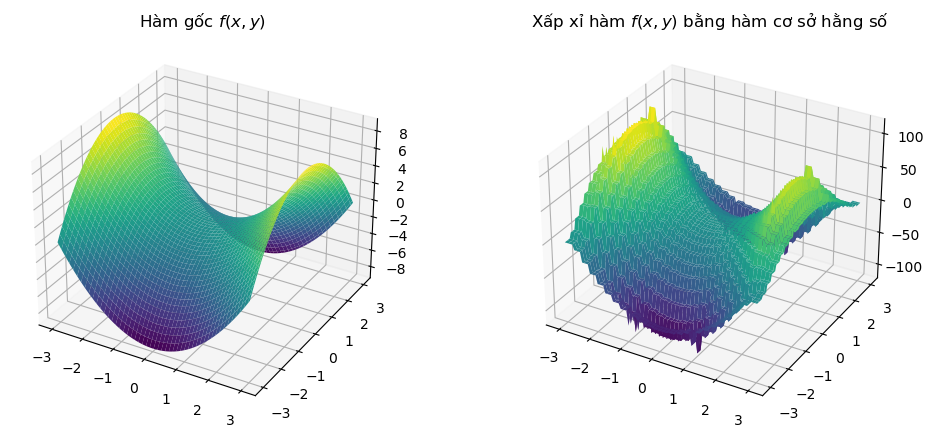

In [58]:

fig = plt.figure(figsize=(12, 5))

# Đồ thị hàm gốc
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_sample, cmap='viridis')
ax1.set_title('Hàm gốc $f(x, y)$')

# Đồ thị xấp xỉ bằng hàm cơ sở hằng số
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_approximated, cmap='viridis')
ax2.set_title('Xấp xỉ hàm $f(x, y)$ bằng hàm cơ sở hằng số')

plt.show()


## Hàm cơ sở tuyến tính

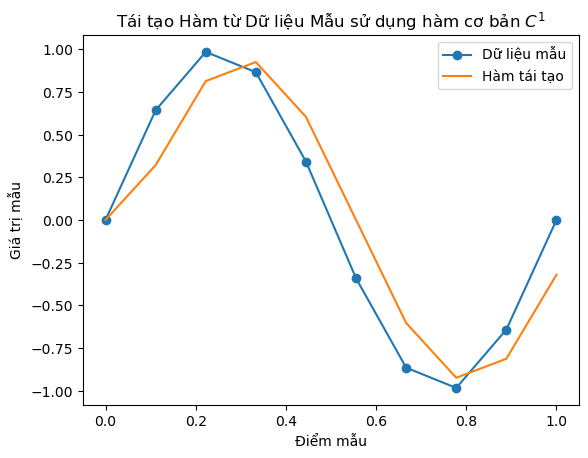

In [59]:
# Hàm C^1
def C1_function(x, xi, xi1):
    return max(0, 1 - abs((x - (xi + xi1) / 2) / (xi1 - xi)))

# Tái tạo hàm liên tục từ dữ liệu mẫu
def reconstruct_function(samples, global_basis):
    num_samples = len(samples)
    num_cells = num_samples - 1
    reconstructed_function = np.zeros_like(samples)

    for i in range(num_cells):
        xi, xi1 = i, i + 1
        for j in range(num_samples):
            reconstructed_function[j] += samples[i] * global_basis(j, xi, xi1)

    return reconstructed_function

# Tạo dữ liệu mẫu
num_samples = 10
sample_points = np.linspace(0, 1, num_samples)
sample_values = np.sin(2 * np.pi * sample_points)

# Tái tạo hàm từ dữ liệu mẫu
reconstructed_function = reconstruct_function(sample_values, C1_function)

# Hiển thị kết quả
plt.plot(sample_points, sample_values, 'o-', label='Dữ liệu mẫu')
plt.plot(sample_points, reconstructed_function, label='Hàm tái tạo')
plt.legend()
plt.xlabel('Điểm mẫu')
plt.ylabel('Giá trị mẫu')
plt.title('Tái tạo Hàm từ Dữ liệu Mẫu sử dụng hàm cơ bản $C^1$')
plt.show()


###  Tái tạo hàm liên tục từ dữ liệu mẫu trên lưới (sử dụng hàm nội suy có sẵn)

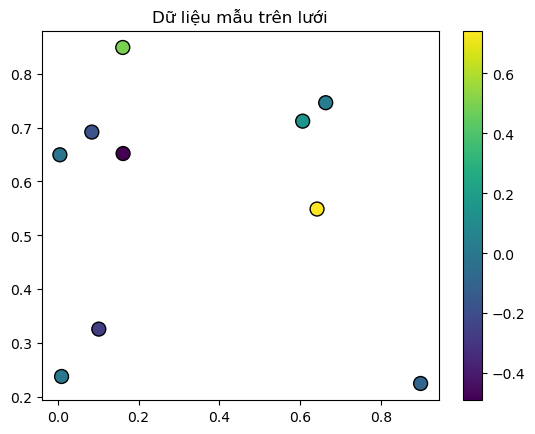

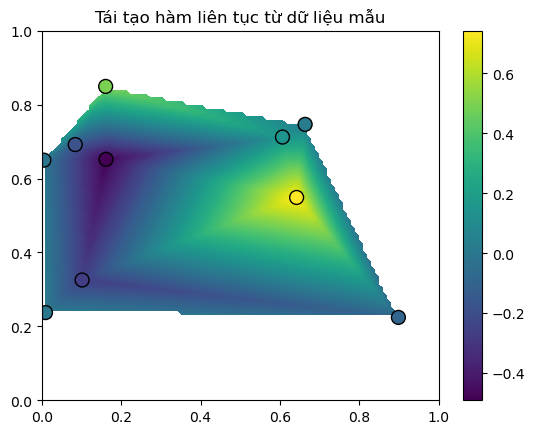

In [60]:
from scipy.interpolate import griddata

# Tạo dữ liệu mẫu
x_sample = np.random.rand(10)
y_sample = np.random.rand(10)
z_sample = np.sin(2 * np.pi * x_sample) * np.cos(2 * np.pi * y_sample)

# Tạo lưới
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

# Tái tạo hàm liên tục từ dữ liệu mẫu
z_grid = griddata((x_sample, y_sample), z_sample, (x_grid, y_grid), method='linear')

# Hiển thị dữ liệu mẫu
plt.scatter(x_sample, y_sample, c=z_sample, cmap='viridis', edgecolors='k', marker='o', s=100)
plt.title('Dữ liệu mẫu trên lưới')
plt.colorbar()
plt.show()

# Hiển thị hàm liên tục tái tạo
plt.contourf(x_grid, y_grid, z_grid, cmap='viridis', levels=100)
plt.scatter(x_sample, y_sample, c=z_sample, cmap='viridis', edgecolors='k', marker='o', s=100)
plt.title('Tái tạo hàm liên tục từ dữ liệu mẫu')
plt.colorbar()
plt.show()


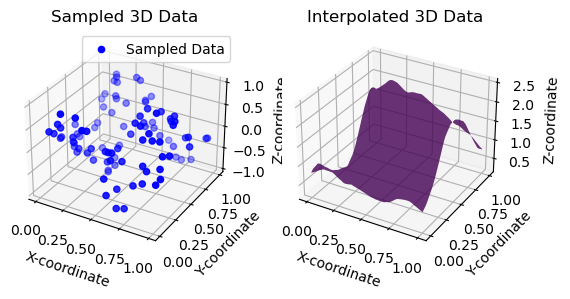

In [61]:
# Tạo dữ liệu mẫu
np.random.seed(42)
num_samples = 100
x_samples = np.random.rand(num_samples)
y_samples = np.random.rand(num_samples)
z_samples = np.sin(2 * np.pi * x_samples) * np.cos(2 * np.pi * y_samples)  # Dữ liệu mẫu là hàm sin(x)*cos(y)

# Tạo lưới mẫu
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

# Hàm nội suy tuyến tính
def linear_interpolation(x, y, x_samples, y_samples, values):
    n = len(x_samples)
    result = np.zeros_like(x)
    
    for i in range(n):
        result += values[i] * (1 - np.abs(x - x_samples[i])) * (1 - np.abs(y - y_samples[i]))
    
    return result

# Nội suy và tái tạo dữ liệu
z_grid = linear_interpolation(grid_x, grid_y, x_samples, y_samples, z_samples)

# Hiển thị dữ liệu mẫu và dữ liệu tái tạo trong biểu đồ 3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_samples, y_samples, z_samples, c='b', marker='o', label='Sampled Data')
ax.set_title('Sampled 3D Data')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(grid_x, grid_y, z_grid, cmap='viridis', alpha=0.8, rstride=100, cstride=100)
ax.set_title('Interpolated 3D Data')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')

plt.show()
